In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

#### I am only going to do one year due to timing and computing strenghts. My goal will be to do unsupervised learning to find similarities in the bills. One finding may be common words based on congressional intent of the legislation.

# Approach 1 "Analyst Judgement" Simple Count Vectorization

In [2]:
import re
import pandas as pd
import string
import os
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from IPython.display import clear_output
import pickle
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import enchant

d = enchant.Dict("en_US")
words = set(nltk.corpus.words.words())

#I am just going to use the 2021 senate corpus for this assignment
### this will create a list of all words used in the entire corpus to align comparison. I will fit the vectorizer on this then transform each text file
stopwords = nltk.corpus.stopwords.words('english')
full_word_list = []
total_files=len(os.listdir('C:/Users/micha/OneDrive/Desktop/453/bills/2021/Senate'))
counter=0

for file in os.listdir('C:/Users/micha/OneDrive/Desktop/453/bills/2021/Senate'):
    
    with open('C:/Users/micha/OneDrive/Desktop/453/bills/2021/Senate/{}'.format(file)) as fp:
        soup = BeautifulSoup(fp, 'html.parser')
    text = soup.get_text()
    text=re.sub("\s+", " ", text)
    text=re.sub("[^-9A-Za-z ]", "" , text)
    pattern = r'[0-9]'
    text=re.sub(pattern, '', text)
    text = "".join([i for i in text if i not in string.punctuation])
    text = "".join([i.lower() for i in text if i not in string.punctuation])
    text = word_tokenize(text)
    text = [i for i in text if len(i) > 1]
    text = [i for i in text if i not in stopwords]
    text = [w for w in text if d.check(w)]
    [full_word_list.append(x) for x in text if x not in full_word_list]
    print("Percent Complete: {:7}%".format(str(round((counter/total_files)*100, 4))))
    clear_output(wait=True)
    counter=counter+1

full_word_list

['congressional',
 'bills',
 'congress',
 'us',
 'government',
 'publishing',
 'office',
 'res',
 'introduced',
 'senate',
 'doc',
 'session',
 'relating',
 'disapproval',
 'proposed',
 'export',
 'kingdom',
 'certain',
 'defense',
 'articles',
 'united',
 'states',
 'following',
 'joint',
 'resolution',
 'read',
 'twice',
 'referred',
 'committee',
 'foreign',
 'relations',
 'resolved',
 'house',
 'representatives',
 'assembled',
 'issuance',
 'license',
 'respect',
 'hereby',
 'prohibited',
 'transfer',
 'including',
 'services',
 'technical',
 'data',
 'described',
 'certification',
 'transmittal',
 'sent',
 'speaker',
 'chairmen',
 'affairs',
 'pursuant',
 'subsections',
 'section',
 'arms',
 'control',
 'act',
 'additional',
 'iv',
 'weapon',
 'systems',
 'st',
 'designate',
 'additions',
 'rough',
 'mountain',
 'wilderness',
 'rich',
 'hole',
 'national',
 'forest',
 'purposes',
 'march',
 'bill',
 'agriculture',
 'nutrition',
 'forestry',
 'enacted',
 'short',
 'title',
 'may',


In [4]:
vector = CountVectorizer()
vector.fit(full_word_list)

CountVectorizer()

In [5]:
bill_index=[]

count_vector=np.zeros((total_files, len(full_word_list)), dtype=int)

row_index=0

with open('C:/Users/micha/OneDrive/Desktop/453/bills/2021/Senate/{}'.format('2021BILLS-116sjres82is.html')) as fp:
    soup = BeautifulSoup(fp, 'html.parser')
text = soup.get_text()
text=re.sub("\s+", " ", text)
text=re.sub("[^-9A-Za-z ]", "" , text)
pattern = r'[0-9]'
text=re.sub(pattern, '', text)
text = "".join([i for i in text if i not in string.punctuation])
text = "".join([i.lower() for i in text if i not in string.punctuation])
text = word_tokenize(text)
text = [i for i in text if len(i) > 1]
text = [i for i in text if i not in stopwords]
text = [w for w in text if d.check(w)]
vectorized=vector.transform(text)
vectorized_text=vectorized.toarray()
new_row=vectorized_text.sum(axis=0)
count_vector[row_index, :]=new_row
row_index=row_index+1
bill_index.append(file)

In [6]:
##### creating transformed vectors for each document

#### CountVectorizer

#### this is approach unique but it works to create a fully vectorized count array of a massive corpus. 

total_files=len(os.listdir('C:/Users/micha/OneDrive/Desktop/453/bills/2021/Senate'))
counter=0
bill_index=[]

count_vector=np.zeros((total_files, len(full_word_list)), dtype=int)

row_index=0

for file in os.listdir('C:/Users/micha/OneDrive/Desktop/453/bills/2021/Senate'):
    
    with open('C:/Users/micha/OneDrive/Desktop/453/bills/2021/Senate/{}'.format(file)) as fp:
        soup = BeautifulSoup(fp, 'html.parser')
    text = soup.get_text()
    text=re.sub("\s+", " ", text)
    text=re.sub("[^-9A-Za-z ]", "" , text)
    pattern = r'[0-9]'
    text=re.sub(pattern, '', text)
    text = "".join([i for i in text if i not in string.punctuation])
    text = "".join([i.lower() for i in text if i not in string.punctuation])
    text = word_tokenize(text)
    text = [i for i in text if len(i) > 1]
    text = [i for i in text if i not in stopwords]
    text = [w for w in text if d.check(w)]
    vectorized=vector.transform(text)
    vectorized_text=vectorized.toarray()
    new_row=vectorized_text.sum(axis=0)
    count_vector[row_index, :]=new_row
    row_index=row_index+1
    bill_index.append(file)
    print("Percent Complete: {:7}%".format(str(round((counter/total_files)*100, 4))))
    clear_output(wait=True)
    counter=counter+1

Percent Complete: 99.9718%


In [7]:
approach_1=pd.DataFrame(data=count_vector, columns=vector.get_feature_names(), index=bill_index)
approach_1.to_csv('count_vectorized')
approach_1

,aa,ab,aba,abandon,abandoned,abandoning,abandonment,abandons,abate,abated,...,zombie,zone,zoned,zones,zoning,zoo,zoonosis,zooplankton,zoos,zoster
2021BILLS-116sjres82is.html,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021BILLS-117s1000is.html,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021BILLS-117s1001is.html,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021BILLS-117s1002is.html,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021BILLS-117s1003is.html,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021BILLS-117sres95is.html,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021BILLS-117sres96is.html,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021BILLS-117sres97is.html,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021BILLS-117sres98is.html,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# this issue with this vectorizer is that it, in its limitations, is similar to the input pools of Convolutional neural networks. This is because while it has counts
# it ignores the relationships between between words within the corpus. Simply put counts do not tell the whole story. There is a solution, which is a transformer network for 
# text embeddings. 

In [10]:
def top_cols(dftemp,ncols):
    dfsum = dftemp.sum().to_frame().reset_index()
    dfsum = dfsum.sort_values(by=0,ascending=False, inplace=False).head(ncols)
    top_cols = dfsum['index'].tolist()
    return dftemp[top_cols]

for col in top_cols(approach_1,25).columns:
    print('Column: {:15} Count:{}'.format(col, approach_1[col].sum()))

Column: section         Count:58120
Column: shall           Count:56677
Column: act             Count:45978
Column: states          Count:34701
Column: united          Count:32031
Column: secretary       Count:31954
Column: subsection      Count:27805
Column: state           Count:23871
Column: paragraph       Count:23066
Column: may             Count:22279
Column: ii              Count:20838
Column: sec             Count:20325
Column: including       Count:19645
Column: federal         Count:19632
Column: program         Count:18273
Column: title           Count:18048
Column: following       Count:17042
Column: term            Count:16854
Column: year            Count:16360
Column: health          Count:16193
Column: congress        Count:15406
Column: date            Count:14933
Column: described       Count:14522
Column: inserting       Count:13896
Column: senate          Count:13736


C:\Users\micha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


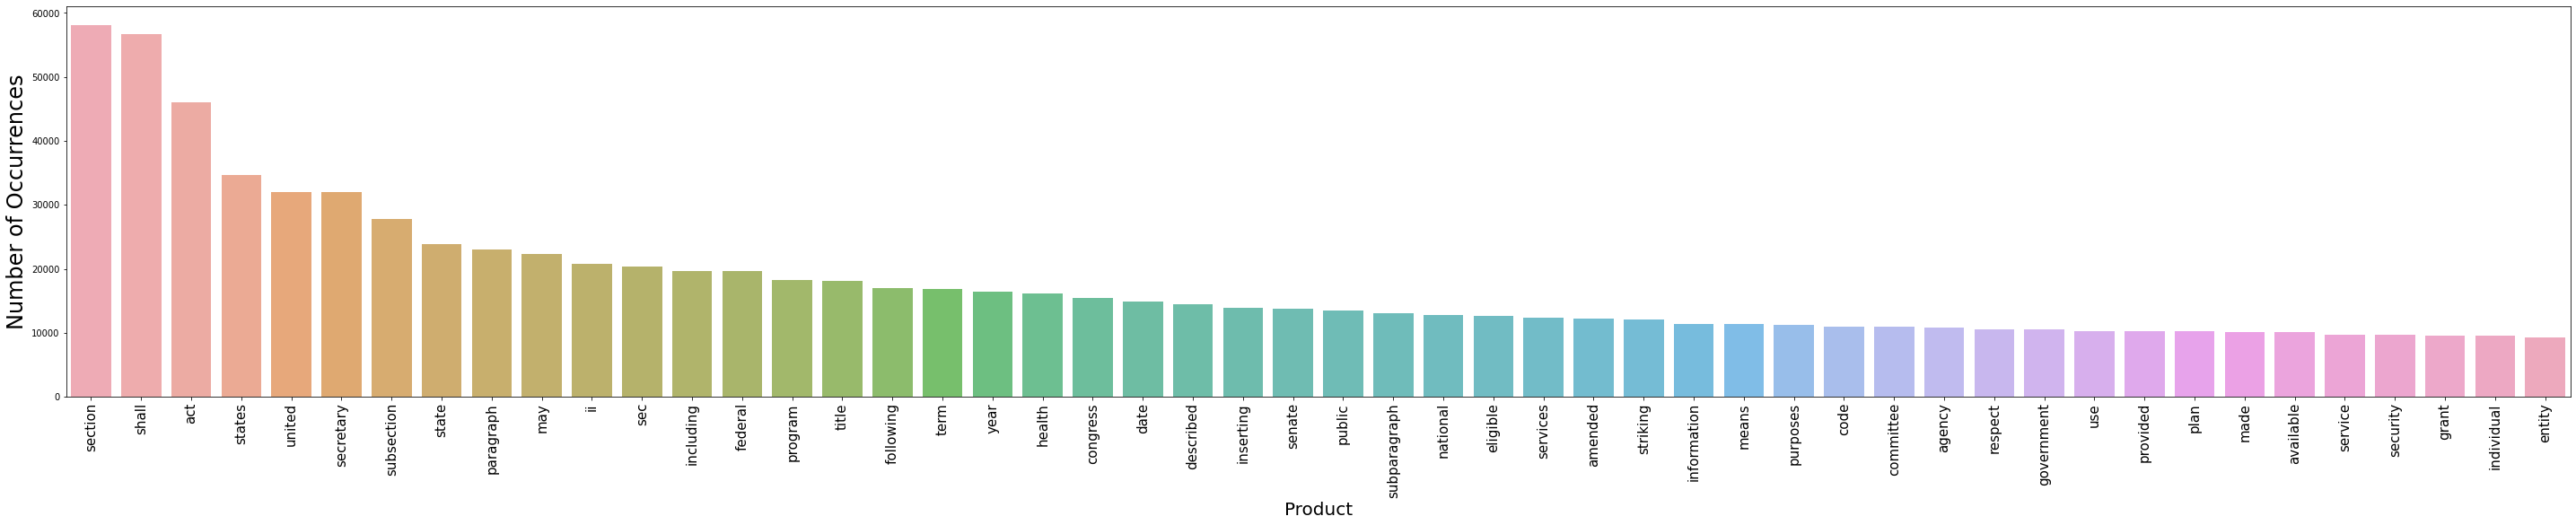

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
cnt_pro = approach_1.sum()
cnt_pro = cnt_pro.sort_values(ascending=False)
cnt_pro=cnt_pro.head(50)
plt.figure(figsize=(50,8))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=24)
plt.xlabel('Product', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.show()

In [39]:
# it is quite clear from above that we are getting words that are shared in each document and they dont really mean much to the content of the bill. I will now attempt a pca analysis
# to determine which values have more relevance. If this works then clustering would be an option after which we could look at shared words to determine congressional intent of the 
# bills and what categories would fit them.


# Due to similar wording in legal text it will be crucial down the line to identify common words that are not a part of every bill and whos variance is high enough to provide meaningful analysis. 

from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(count_vector)
print(pca.explained_variance_ratio_)


##### it looks like based on the variance ratio that this method is not going to give us what we need.  

[0.37348615 0.07168374 0.06649489 0.05109763 0.03808172 0.03471519
 0.02299575 0.01839299 0.01512596 0.0120965  0.00949639 0.00912851
 0.00869679 0.00723392 0.00711729]


# Approach 2

In [41]:
### it is clear that this vectorizer requires a full corpus input. I will rejoin the invidual words into single strings and combine into array 
# but I will still clean them. Lets see if I crash my computer from the massive list!

from sklearn.feature_extraction.text import TfidfVectorizer
total_files=len(os.listdir('C:/Users/micha/OneDrive/Desktop/453/bills/2021/Senate'))
counter=0
bill_index=[]

full_corpus=[]

tfidf_vector=np.zeros((total_files, len(full_word_list)), dtype=int)

row_index=0

for file in os.listdir('C:/Users/micha/OneDrive/Desktop/453/bills/2021/Senate'):
    
    with open('C:/Users/micha/OneDrive/Desktop/453/bills/2021/Senate/{}'.format(file)) as fp:
        soup = BeautifulSoup(fp, 'html.parser')
    text = soup.get_text()
    text=re.sub("\s+", " ", text)
    text=re.sub("[^-9A-Za-z ]", "" , text)
    pattern = r'[0-9]'
    text=re.sub(pattern, '', text)
    text = "".join([i for i in text if i not in string.punctuation])
    text = "".join([i.lower() for i in text if i not in string.punctuation])
    text = word_tokenize(text)
    text = [i for i in text if len(i) > 1]
    text = [i for i in text if i not in stopwords]
    text = [w for w in text if d.check(w)]
    text = ' '.join(text)
    full_corpus.append(text)
    bill_index.append(file)
    print("Percent Complete: {:7}%".format(str(round((counter/total_files)*100, 4))))
    clear_output(wait=True)
    counter=counter+1

Percent Complete: 99.9718%


In [43]:
vector2 = TfidfVectorizer()
approach_2=vector2.fit_transform(full_corpus)
approach_2 = pd.DataFrame(approach_2.toarray(), columns=vector2.get_feature_names(), index=bill_index)
approach_2.to_csv('tfidf_vectorized')
approach_2

,aa,ab,aba,abandon,abandoned,abandoning,abandonment,abandons,abate,abated,...,zombie,zone,zoned,zones,zoning,zoo,zoonosis,zooplankton,zoos,zoster
2021BILLS-116sjres82is.html,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021BILLS-117s1000is.html,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021BILLS-117s1001is.html,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021BILLS-117s1002is.html,0.003313,0.004394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021BILLS-117s1003is.html,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021BILLS-117sres95is.html,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021BILLS-117sres96is.html,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021BILLS-117sres97is.html,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021BILLS-117sres98is.html,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
approach_2.max()

aa             0.203626
ab             0.178848
aba            0.088031
abandon        0.068412
abandoned      0.226642
                 ...   
zoo            0.029636
zoonosis       0.027171
zooplankton    0.027830
zoos           0.046686
zoster         0.078383
Length: 22060, dtype: float64

C:\Users\micha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


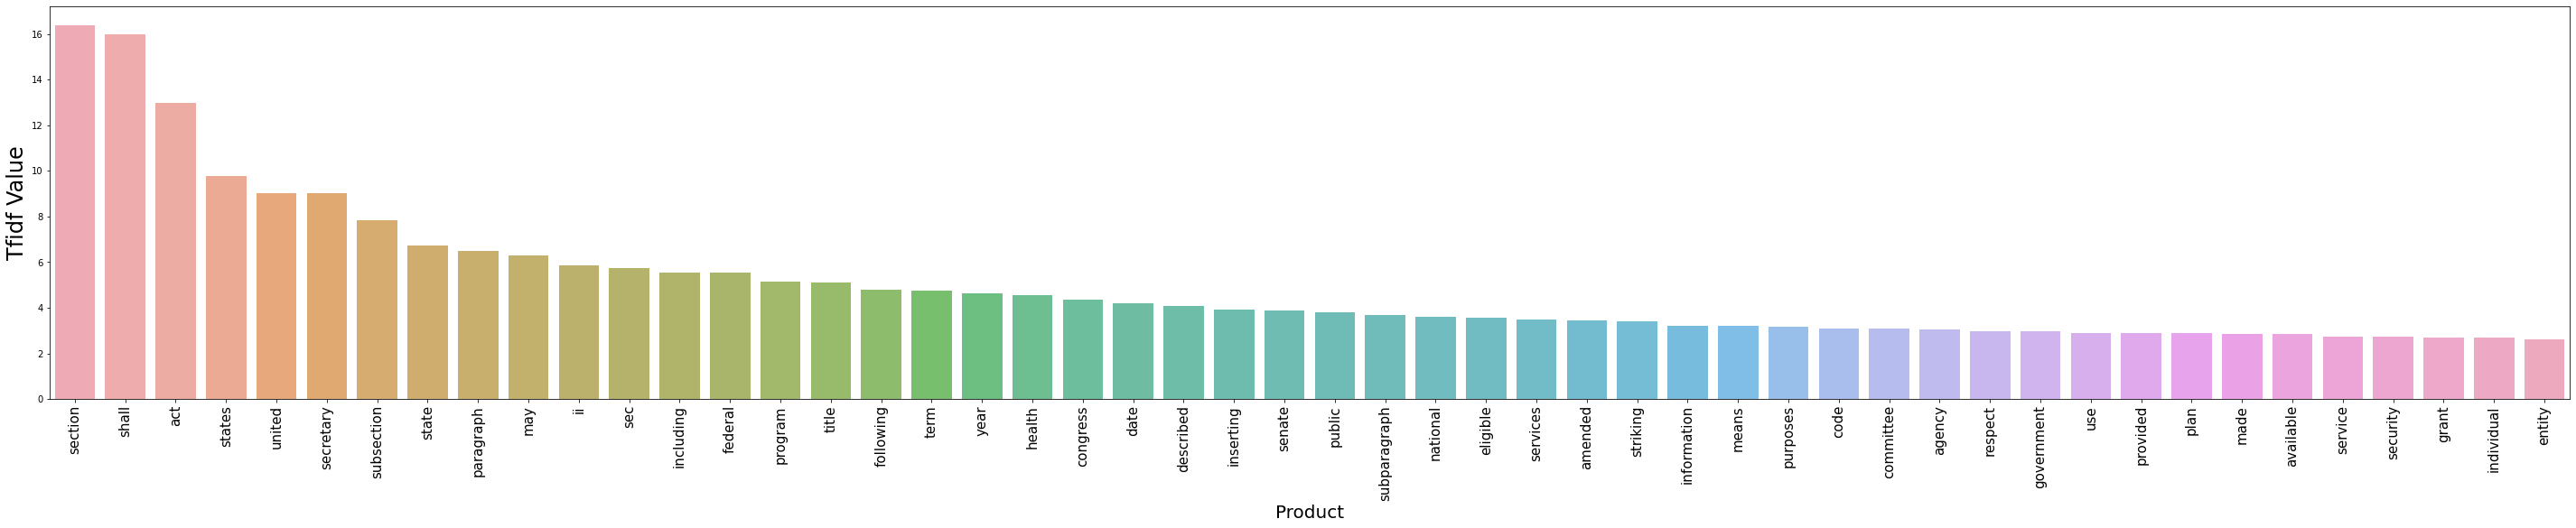

In [46]:
cnt_pro = approach_1.mean()
cnt_pro = cnt_pro.sort_values(ascending=False)
cnt_pro=cnt_pro.head(50)
plt.figure(figsize=(50,8))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Tfidf Value', fontsize=24)
plt.xlabel('Product', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.show()

# Approach 3

In [98]:
import nltk
from sklearn.model_selection import train_test_split

full_corpus_df=pd.DataFrame({
    'bill': bill_index,
    'text': full_corpus
})

from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens


tagged = full_corpus_df.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['text']), tags=[r.bill]), axis=1)



In [162]:
from sklearn import utils

import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import common_texts
from tqdm import tqdm
import re
import seaborn as sns
import matplotlib.pyplot as plt
import multiprocessing
cores = multiprocessing.cpu_count()
model = Doc2Vec(dm=0, negative=5, hs=0, min_count=2, sample = 0, workers=cores, vector_size=len(tagged.values))
model.build_vocab([x for x in tqdm(tagged.values)])

100%|██████████| 3545/3545 [00:00<00:00, 3558833.82it/s]


In [163]:
%%time
for epoch in range(30):
    model.train(utils.shuffle([x for x in tqdm(tagged.values)]), total_examples=len(tagged.values), epochs=1)
    model.alpha -= 0.002
    model.min_alpha = model.alpha

100%|██████████| 3545/3545 [00:00<00:00, 3543567.13it/s]


Wall time: 5min 27s
